<center><h1>1-c: SVM</h1></center>

<center><h2><a href="https://rdfia.github.io/">Course link</a></h2></center>

# Warning : 
# Do "File -> Save a copy in Drive" before you start modifying the notebook, otherwise your modifications will not be saved.


In [1]:
!wget https://github.com/rdfia/rdfia.github.io/raw/master/data/15_scenes_Xy.npz

--2022-10-14 17:28:41--  https://github.com/rdfia/rdfia.github.io/raw/master/data/15_scenes_Xy.npz
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rdfia/rdfia.github.io/master/data/15_scenes_Xy.npz [following]
--2022-10-14 17:28:41--  https://raw.githubusercontent.com/rdfia/rdfia.github.io/master/data/15_scenes_Xy.npz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35952210 (34M) [application/octet-stream]
Saving to: ‘15_scenes_Xy.npz’

15_scenes_Xy.npz    100%[===================>]  34.29M   166MB/s    in 0.2s    

2022-10-14 17:28:42 (166 MB/s) - ‘15_scenes_Xy.npz’ saved [35952210/35952210]



In [2]:
%pylab inline

import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import KFold, train_test_split

Populating the interactive namespace from numpy and matplotlib


Loading BoW of the whole dataset (4485 images, thus 4485 dictionnary of 1001 words):

In [3]:
data = np.load("15_scenes_Xy.npz")
X = data["X"]
y = data["y"]

X.shape, y.shape

((4485, 1001), (4485,))

Let's see what is the class distribution:

In [4]:
{c: nb for c, nb in enumerate(np.bincount(y))}

{0: 241,
 1: 360,
 2: 328,
 3: 260,
 4: 308,
 5: 374,
 6: 410,
 7: 292,
 8: 356,
 9: 215,
 10: 216,
 11: 311,
 12: 210,
 13: 289,
 14: 315}

Split the dataset into a train & test set:

In [5]:
X_, X_test, y_, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Then a validation set from the train set:

In [6]:
X_train, X_val, y_train, y_val = train_test_split(X_, y_, test_size=0.65, random_state=42)

Let's hyperparameter gridsearch over different values of `C`:

In [7]:
C_values = np.linspace(1, 81, 20)
accuracies = []

for c in C_values:
  print(f'Training SVM with C={c}')
  svc = SVC(C=c)

  # Fit on sub-train set
  svc.fit(X_train, y_train)

  # Evaluate on val set
  acc = svc.score(X_val, y_val)
  accuracies.append(acc)
  print(f'--> accuracy = {acc}')

Training SVM with C=1.0
--> accuracy = 0.35319331333047577
Training SVM with C=5.2105263157894735
--> accuracy = 0.5709387055293613
Training SVM with C=9.421052631578947
--> accuracy = 0.6142306043720531
Training SVM with C=13.631578947368421
--> accuracy = 0.6305186455207887
Training SVM with C=17.842105263157894
--> accuracy = 0.6476639519931419
Training SVM with C=22.052631578947366
--> accuracy = 0.6536648092584655
Training SVM with C=26.263157894736842
--> accuracy = 0.6596656665237891
Training SVM with C=30.473684210526315
--> accuracy = 0.6622374624946421
Training SVM with C=34.68421052631579
--> accuracy = 0.6678096870981569
Training SVM with C=38.89473684210526
--> accuracy = 0.6703814830690099
Training SVM with C=43.10526315789473
--> accuracy = 0.6703814830690099
Training SVM with C=47.315789473684205
--> accuracy = 0.6716673810544364
Training SVM with C=51.526315789473685
--> accuracy = 0.675096442348907
Training SVM with C=55.73684210526316
--> accuracy = 0.675525075010715

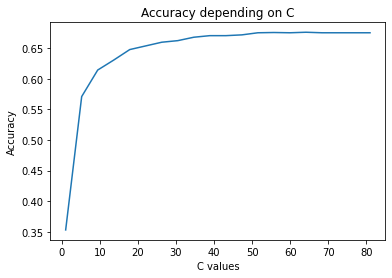

In [8]:
plt.plot(C_values, accuracies)
plt.ylabel('Accuracy')
plt.xlabel('C values')
plt.title('Accuracy depending on C')
plt.show()

In [9]:
best_C = C_values[np.argmax(accuracies)]
final_svc = SVC(C=best_C)
final_svc.fit(X_, y_)
print(f'Accuracy with best C value {best_C}', final_svc.score(X_test, y_test))

Accuracy with best C value 64.15789473684211 0.7424749163879598


Do the same with different kernel values, and different decision functions:

In [10]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
accuracies_k = []

for k in kernels:
  print(f'Training SVM with kernel {k}')
  svc = SVC(C=best_C, kernel=k)

  # Fit on sub-train set
  svc.fit(X_train, y_train)

  # Evaluate on val set
  acc = svc.score(X_val, y_val)
  accuracies_k.append(acc)
  print(f'--> accuracy = {acc}')

Training SVM with kernel linear
--> accuracy = 0.6763823403343335
Training SVM with kernel poly
--> accuracy = 0.4993570510072868
Training SVM with kernel rbf
--> accuracy = 0.6759537076725246
Training SVM with kernel sigmoid
--> accuracy = 0.18945563651950278


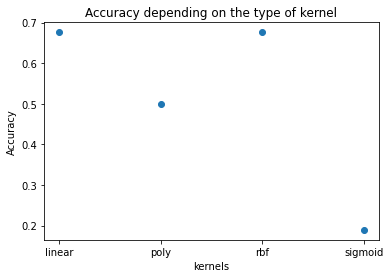

In [12]:
plt.scatter(kernels , accuracies_k)
plt.ylabel('Accuracy')
plt.xlabel('kernels')
plt.title('Accuracy depending on the type of kernel')
plt.show()

In [12]:
best_C = C_values[np.argmax(accuracies)]
final_svc = SVC(C=best_C)
final_svc.fit(X_, y_)
print(f'Accuracy with best C value {best_C}', final_svc.score(X_test, y_test))

In [13]:
strategy = ['ovo', 'ovr']
accuracies = []

for strat in strategy:
  print(f'Training SVM with strategy={strat}')
  svc = SVC(C=best_C, decision_function_shape=strat)

  # Fit on sub-train set
  svc.fit(X_train, y_train)

  # Evaluate on val set
  acc = svc.score(X_val, y_val)
  accuracies.append(acc)
  print(f'--> accuracy = {acc}')

Training SVM with strategy=ovo
--> accuracy = 0.6759537076725246
Training SVM with strategy=ovr
--> accuracy = 0.6759537076725246


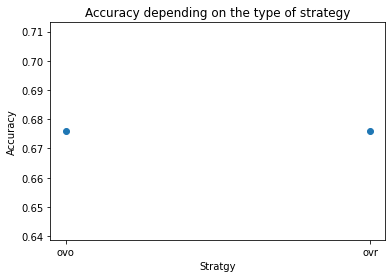

In [14]:
plt.scatter(strategy , accuracies)
plt.ylabel('Accuracy')
plt.xlabel('Stratgy')
plt.title('Accuracy depending on the type of strategy')
plt.show()